In [1]:
res_path = "C:\\Users\\Geoffroy Leconte\\Documents\\doctorat\\code\\docGL\\amdahl_benchmarks\\results"
using DataFrames, SolverBenchmark, SolverTools, JLD2, Plots

function open_file(path)
    file = jldopen(path, "r")
    df_out = file["stats"]
    close(file)
    return df_out
end

open_file (generic function with 1 method)

In [5]:
rip_mono = open_file(string(res_path, "\\G-2021-03_qp_mono.jld2"));
rip_mono1 = open_file(string(res_path, "\\ripqp_mono_1_qp.jld2"));
rip_mono_nrtol1 = open_file(string(res_path, "\\ripqp_mono_nrtol_1_qp.jld2"));
rip_mono_d1 = open_file(string(res_path, "\\ripqp_dynamic_1_qp.jld2"));
rip_mono_c1 = open_file(string(res_path, "\\ripqp_ccorr_1_qp.jld2"));
rip_multi1 = open_file(string(res_path, "\\ripqp_multi_1_qp.jld2"));
rip_multi_d1 = open_file(string(res_path, "\\ripqp_multi_dynamic_1_qp.jld2"));

# K2_5
rip_monoK251 = open_file(string(res_path, "\\ripqp_mono_K25_1_qp.jld2"));
rip_mono_dK251 = open_file(string(res_path, "\\ripqp_dynamic_K25_1_qp.jld2"));
rip_multiK251 = open_file(string(res_path, "\\ripqp_multi_K25_1_qp.jld2"));
rip_multi_dK251 = open_file(string(res_path, "\\ripqp_multi_dynamic_K25_1_qp.jld2"));

# K2_5 one step
rip_monoosK251 = open_file(string(res_path, "\\ripqp_mono_osK25_1_qp.jld2")); # r, γ =  T(0.999), T(0.05)
rip_monoosK252 = open_file(string(res_path, "\\ripqp_mono_osK25_2_qp.jld2")); # r, γ =  T(0.95), T(0.1)

# comparisons zoom1
rip_monoK2 = open_file(string(res_path, "\\ripqp_mono_K2_qp.jld2"));
rip_multiK2 = open_file(string(res_path, "\\ripqp_multi_K2_qp.jld2"));
rip_mono_z = open_file(string(res_path, "\\ripqp_mono_z_qp.jld2")); # ϵ_rbz = 1e-5
rip_mono_z2 = open_file(string(res_path, "\\ripqp_mono_z2_qp.jld2")); # ϵ_rbz = 1e-7
rip_multi_z = open_file(string(res_path, "\\ripqp_multi_z_qp.jld2")); 
rip_multi_z2 = open_file(string(res_path, "\\ripqp_multi_z2_qp.jld2")); # ϵ_pdd32 = 1.0 
rip_mono_r = open_file(string(res_path, "\\ripqp_mono_r_qp.jld2")); # ϵ_rbz = 1e-5
rip_multi_r = open_file(string(res_path, "\\ripqp_multi_r_qp.jld2")); 
rip_multi_r2 = open_file(string(res_path, "\\ripqp_multi_r2_qp.jld2")); # ϵ_pdd32 = 1.0 


In [6]:
stats_qp = Dict(
#               :ripqp_mono        => rip_mono,
#               :ripqp_mono1       => rip_mono1,
                # :ripqp_mono_nrtol1 => rip_mono_nrtol1,
#               :ripqp_mono_d1   => rip_mono_d1,
                # :ripqp_mono_c1   => rip_mono_c1,
#               :rip_monoK251    => rip_monoK251,
#               :rip_mono_dK251  => rip_mono_dK251,
                :rip_monoK2      => rip_monoK2,
                :rip_mono_z      => rip_mono_z,
                :rip_mono_z2      => rip_mono_z2,
                :rip_mono_r      => rip_mono_r,
               )

Dict{Symbol,DataFrame} with 4 entries:
  :rip_mono_r  => 123×30 DataFrame. Omitted printing of 23 columns…
  :rip_mono_z  => 123×31 DataFrame. Omitted printing of 24 columns…
  :rip_mono_z2 => 123×31 DataFrame. Omitted printing of 24 columns…
  :rip_monoK2  => 123×31 DataFrame. Omitted printing of 24 columns…

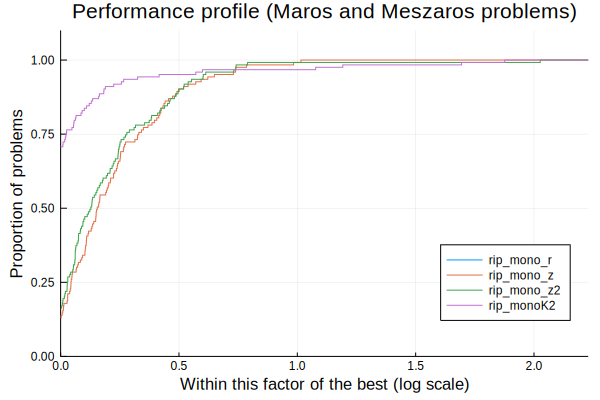

In [7]:
perf = performance_profile(stats_qp, df->df.elapsed_time)
plot!(perf, legend=:bottomright)
title!("Performance profile (Maros and Meszaros problems)")

In [5]:
rip_mono1bis = copy(rip_mono1);
rip_mono1bis.iter .*= 2;

stats_it = Dict(
                :rip_mono1bis   => rip_mono1bis,
                :rip_monoosK251 => rip_monoosK251,
                :rip_monoosK252 => rip_monoosK252,
                )

Dict{Symbol,DataFrame} with 2 entries:
  :rip_mono1bis   => 123×31 DataFrame. Omitted printing of 24 columns…
  :rip_monoosK251 => 123×31 DataFrame. Omitted printing of 24 columns…

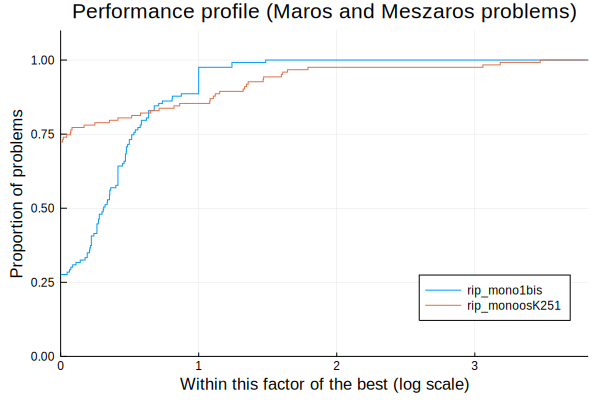

In [6]:
perf2 = performance_profile(stats_it, df->df.iter)
plot!(perf2, legend=:bottomright)
title!("Performance profile (Maros and Meszaros problems)")

In [9]:
# stats multi
stats_qp = Dict(
                :rip_multiK2      => rip_multiK2,
                :rip_multi_z      => rip_multi_z,
                :rip_multi_z2      => rip_multi_z2,
                :rip_multi_r      => rip_multi_r,
                :rip_multi_r2      => rip_multi_r2,
               )

Dict{Symbol,DataFrame} with 5 entries:
  :rip_multiK2  => 123×31 DataFrame. Omitted printing of 24 columns…
  :rip_multi_z2 => 123×31 DataFrame. Omitted printing of 24 columns…
  :rip_multi_r2 => 123×30 DataFrame. Omitted printing of 23 columns…
  :rip_multi_r  => 123×30 DataFrame. Omitted printing of 23 columns…
  :rip_multi_z  => 123×31 DataFrame. Omitted printing of 24 columns…

┌ Warning: some measures are zero; shifting all by one
└ @ BenchmarkProfiles C:\Users\Geoffroy Leconte\.julia\packages\BenchmarkProfiles\xB4CX\src\performance_profiles.jl:15


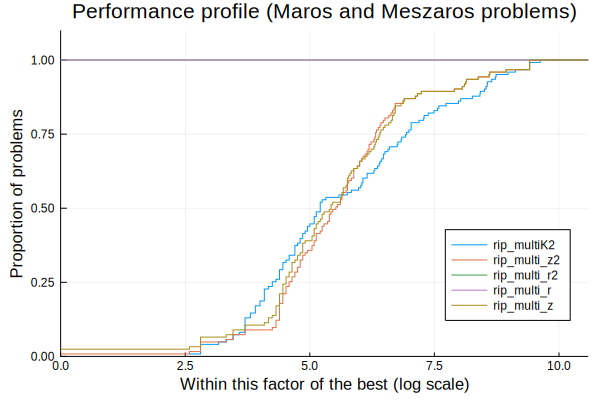

In [10]:
perf = performance_profile(stats_qp, df->df.iter)
plot!(perf, legend=:bottomright)
title!("Performance profile (Maros and Meszaros problems)")

In [12]:
withenv("COLUMNS" => 400, "LINES" => 200) do
    display(rip_multi_r2)
end

,id,name,nvar,ncon,nequ,status,objective,elapsed_time,iter,dual_feas,primal_feas,neval_obj,neval_grad,neval_cons,neval_jcon,neval_jgrad,neval_jac,neval_jprod,neval_jtprod,neval_hess,neval_hprod,neval_jhprod,neval_residual,neval_jac_residual,neval_jprod_residual,neval_jtprod_residual,neval_hess_residual,neval_jhess_residual,neval_hprod_residual,extrainfo
,Int64,String,Int64,Int64,Int64,Symbol,Float64,Float64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String
1,1,AUG2D,20200,10000,0,exception,Inf,Inf,0,Inf,Inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"ArgumentError(""reducing over an empty collection is not allowed"")"
2,2,AUG2DC,20200,10000,0,exception,Inf,Inf,0,Inf,Inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"ArgumentError(""reducing over an empty collection is not allowed"")"
3,3,AUG2DCQP,20200,10000,0,exception,Inf,Inf,0,Inf,Inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"DimensionMismatch(""length of new column absolute_iter_cnt which is 0 must match the number of rows in data frame (2)"")"
4,4,AUG2DQP,20200,10000,0,exception,Inf,Inf,0,Inf,Inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"DimensionMismatch(""length of new column absolute_iter_cnt which is 0 must match the number of rows in data frame (3)"")"
5,5,AUG3D,3873,1000,0,exception,Inf,Inf,0,Inf,Inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"ArgumentError(""reducing over an empty collection is not allowed"")"
6,6,AUG3DC,3873,1000,0,exception,Inf,Inf,0,Inf,Inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"ArgumentError(""reducing over an empty collection is not allowed"")"
7,7,AUG3DCQP,3873,1000,0,exception,Inf,Inf,0,Inf,Inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"DimensionMismatch(""length of new column absolute_iter_cnt which is 0 must match the number of rows in data frame (6)"")"
8,8,AUG3DQP,3873,1000,0,exception,Inf,Inf,0,Inf,Inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"DimensionMismatch(""length of new column absolute_iter_cnt which is 0 must match the number of rows in data frame (7)"")"
9,9,BOYD1,93261,18,0,exception,Inf,Inf,0,Inf,Inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"DimensionMismatch(""length of new column absolute_iter_cnt which is 0 must match the number of rows in data frame (8)"")"
